# Exact Collinearity

We would create a dataset where one of the predictors,x3, is a linear combination of the other predictors.


In [1]:
gen_exact_collin_data = function(num_samples = 100) {
  x1 = rnorm(n = num_samples, mean = 80, sd = 10)
  x2 = rnorm(n = num_samples, mean = 70, sd = 5)
  x3 = 2 * x1 + 4 * x2 + 3
  y = 3 + x1 + x2 + rnorm(n = num_samples, mean = 0, sd = 1)
  data.frame(y, x1, x2, x3)
}

In the generated data the response variable y depends only on x1 and x2.

In [2]:
set.seed(42)
exact_collin_data = gen_exact_collin_data()
head(exact_collin_data)

,y,x1,x2,x3
,<dbl>,<dbl>,<dbl>,<dbl>
1,170.7135,93.70958,76.00483,494.4385
2,152.9106,74.35302,75.22376,452.6011
3,152.7866,83.63128,64.98396,430.1984
4,170.6306,86.32863,79.24241,492.6269
5,152.3320,84.04268,66.66613,437.7499
6,151.3155,78.93875,70.52757,442.9878


 What will happen now if we try to fit a regression model using all of the predictors x1, x2, and x3?


In [3]:
exact_collin_fit = lm(y ~ x1 + x2 + x3, data = exact_collin_data)
summary(exact_collin_fit)


Call:
lm(formula = y ~ x1 + x2 + x3, data = exact_collin_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.57662 -0.66188 -0.08253  0.63706  2.52057 

Coefficients: (1 not defined because of singularities)
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.957336   1.735165   1.704   0.0915 .  
x1          0.985629   0.009788 100.702   <2e-16 ***
x2          1.017059   0.022545  45.112   <2e-16 ***
x3                NA         NA      NA       NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.014 on 97 degrees of freedom
Multiple R-squared:  0.9923,	Adjusted R-squared:  0.9921 
F-statistic:  6236 on 2 and 97 DF,  p-value: < 2.2e-16


R decides to remove x3!!

Let's try to find what is going on.

In [5]:
#X = cbind(1, as.matrix(exact_collin_data[,-1]))
#solve(t(X) %*% X)

In [6]:
summary(exact_collin_fit)


Call:
lm(formula = y ~ x1 + x2 + x3, data = exact_collin_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.57662 -0.66188 -0.08253  0.63706  2.52057 

Coefficients: (1 not defined because of singularities)
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.957336   1.735165   1.704   0.0915 .  
x1          0.985629   0.009788 100.702   <2e-16 ***
x2          1.017059   0.022545  45.112   <2e-16 ***
x3                NA         NA      NA       NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.014 on 97 degrees of freedom
Multiple R-squared:  0.9923,	Adjusted R-squared:  0.9921 
F-statistic:  6236 on 2 and 97 DF,  p-value: < 2.2e-16


Let's try to fit three other models chosing only two out of the three variables in each case and check if the results are same.

In [7]:
fit1 = lm(y ~ x1 + x2, data = exact_collin_data)
fit2 = lm(y ~ x1 + x3, data = exact_collin_data)
fit3 = lm(y ~ x2 + x3, data = exact_collin_data)

In [8]:
all.equal(fitted(fit1), fitted(fit2))


[1] TRUE

In [9]:
all.equal(fitted(fit2), fitted(fit3))


[1] TRUE

In [10]:
coef(fit1)


(Intercept)          x1          x2 
  2.9573357   0.9856291   1.0170586

In [11]:
coef(fit2)


(Intercept)          x1          x3 
  2.1945418   0.4770998   0.2542647

In [12]:
coef(fit3)


(Intercept)          x2          x3 
  1.4788921  -0.9541995   0.4928145

Although their fitted values are all the same, their estimated coefficients are  different.Sign of x2 is opposite in 2nd and 3rd model. This is an example of exact collinearity which is an extreme example of collinearity.

# Collinearity

Collinearity appears in multiple regression model where two or more predictor variables are highly dependent on each other.We will see one example of this phenomenon.

About the dataset: The dataset 'seatpos' is from the faraway package. The predictors in this dataset are various attributes of car drivers, such as their height, weight and age. The response variable hipcenter measures the 'horizontal distance of the midpoint of the hips from a fixed location in the car in mm'. Essentially, it measures the position of the seat for a given driver. This is potentially useful information for car manufacturers considering comfort and safety when designing vehicles.

In [13]:
library(faraway)
data(seatpos)
head(seatpos)

,Age,Weight,HtShoes,Ht,Seated,Arm,Thigh,Leg,hipcenter
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,46,180,187.2,184.9,95.2,36.1,45.3,41.3,-206.300
2,31,175,167.5,165.5,83.8,32.9,36.5,35.9,-178.210
3,23,100,153.6,152.2,82.9,26.0,36.6,31.0,-71.673
4,19,185,190.3,187.4,97.3,37.4,44.1,41.0,-257.720
5,23,159,178.0,174.1,93.9,29.5,40.1,36.9,-173.230
6,47,170,178.7,177.0,92.4,36.0,43.2,37.4,-185.150


Ht and HtShoes are a person’s height and his/her height when wearing shoes and we expect them to be highly correlated.

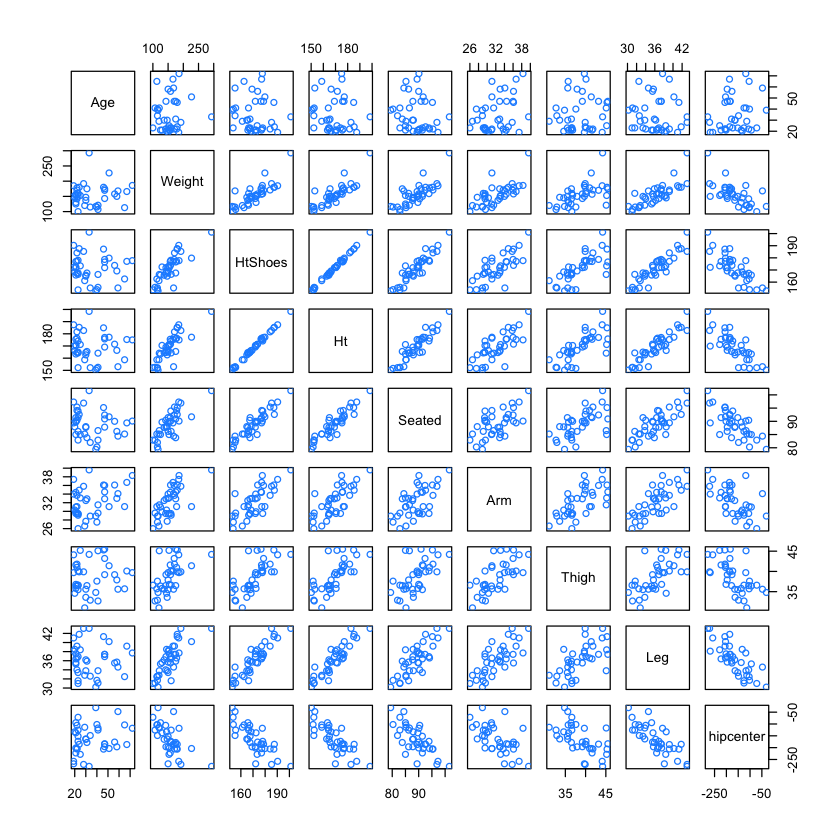

In [14]:
pairs(seatpos, col = "dodgerblue")

In [15]:
#install.packages("faraway")

Let's look into the correlation among the variables in the dataset.

In [16]:
round(cor(seatpos), 2)


,Age,Weight,HtShoes,Ht,Seated,Arm,Thigh,Leg,hipcenter
Age,1.00,0.08,-0.08,-0.09,-0.17,0.36,0.09,-0.04,0.21
Weight,0.08,1.00,0.83,0.83,0.78,0.70,0.57,0.78,-0.64
HtShoes,-0.08,0.83,1.00,1.00,0.93,0.75,0.72,0.91,-0.80
Ht,-0.09,0.83,1.00,1.00,0.93,0.75,0.73,0.91,-0.80
Seated,-0.17,0.78,0.93,0.93,1.00,0.63,0.61,0.81,-0.73
Arm,0.36,0.70,0.75,0.75,0.63,1.00,0.67,0.75,-0.59
Thigh,0.09,0.57,0.72,0.73,0.61,0.67,1.00,0.65,-0.59
Leg,-0.04,0.78,0.91,0.91,0.81,0.75,0.65,1.00,-0.79
hipcenter,0.21,-0.64,-0.80,-0.80,-0.73,-0.59,-0.59,-0.79,1.00


We see that Ht and HtShhoes shows a stron correlation in the scteerplot (~1).

Let's see what happens if we fit a regression model with these two highly correlated variables as predcitors.

In [17]:
hip_model = lm(hipcenter ~ ., data = seatpos)
summary(hip_model)


Call:
lm(formula = hipcenter ~ ., data = seatpos)

Residuals:
    Min      1Q  Median      3Q     Max 
-73.827 -22.833  -3.678  25.017  62.337 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) 436.43213  166.57162   2.620   0.0138 *
Age           0.77572    0.57033   1.360   0.1843  
Weight        0.02631    0.33097   0.080   0.9372  
HtShoes      -2.69241    9.75304  -0.276   0.7845  
Ht            0.60134   10.12987   0.059   0.9531  
Seated        0.53375    3.76189   0.142   0.8882  
Arm          -1.32807    3.90020  -0.341   0.7359  
Thigh        -1.14312    2.66002  -0.430   0.6706  
Leg          -6.43905    4.71386  -1.366   0.1824  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 37.72 on 29 degrees of freedom
Multiple R-squared:  0.6866,	Adjusted R-squared:  0.6001 
F-statistic:  7.94 on 8 and 29 DF,  p-value: 1.306e-05


If we look at the summary of the fitted model, we see that the  F-test for the regression tells us that the regression is significant but each individual predictor is not! 
Opposite signs of the coefficients for Ht and HtShoes are counter intuitive.
Increasing Ht increases hipcenter, but increasing HtShoes decreases hipcenter!

This appears when there exists high correlation among the predictor variables.
In this specific example, the HtShoe variable explains a large amount of the variation in Ht. When they are both in the model, their effects on the response are lessened individually, but together they still explain a large portion of the variation of hipcenter.

Let's see if the variable HtShoes can be explained by other predictors in the model by fitting it to a regression model. 

In [18]:
ht_shoes_model = lm(HtShoes ~ . - hipcenter, data = seatpos)
summary(ht_shoes_model)$r.squared

[1] 0.9967472

In order to understand how collinearity affects our regression estimates we calculate variance inflation factor(vif).



In [19]:
vif(hip_model)


Age     Weight    HtShoes         Ht     Seated        Arm      Thigh 
  1.997931   3.647030 307.429378 333.137832   8.951054   4.496368   2.762886 
       Leg 
  6.694291

The variance inflation factor quantifies the effect of collinearity on the variance of our regression estimates.In practice, if the vif value is greater than 5, it is alarming.In our example we see there is a huge multicollinearity issue as many of the predictors have a VIF greater than 5.

Another way to detect if multicollinearity is affecting the model is to add a random noise term to the model and check if that drastically changes the coefficients.In ideal situation it should not.


In [20]:
set.seed(1337)
noise = rnorm(n = nrow(seatpos), mean = 0, sd = 5)
hip_model_noise = lm(hipcenter + noise ~ ., data = seatpos)

In [21]:
coef(hip_model)


(Intercept)          Age       Weight      HtShoes           Ht       Seated 
436.43212823   0.77571620   0.02631308  -2.69240774   0.60134458   0.53375170 
         Arm        Thigh          Leg 
 -1.32806864  -1.14311888  -6.43904627

In [22]:
coef(hip_model_noise)


(Intercept)          Age       Weight      HtShoes           Ht       Seated 
415.32909380   0.76578240   0.01910958  -2.90377584  -0.12068122   2.03241638 
         Arm        Thigh          Leg 
 -1.02127944  -0.89034509  -5.61777220

This tells us that a model with collinearity is bad at explaining the relationship between the response and the predictors. We cannot even be confident in the direction of the relationship. 

**Does collinearity affect prediction?**

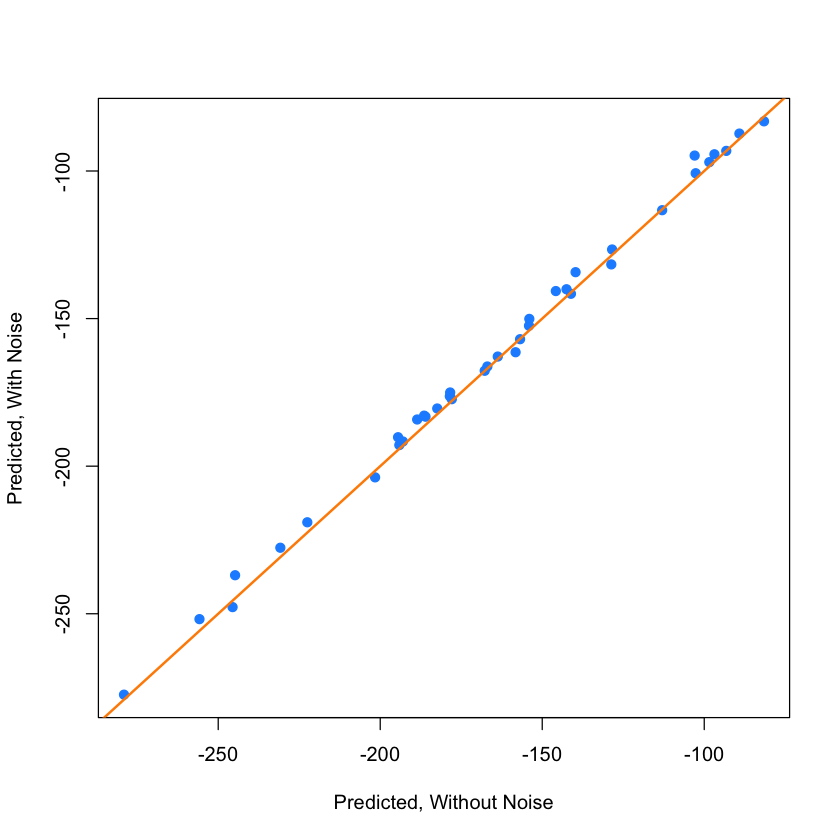

In [23]:
plot(fitted(hip_model), fitted(hip_model_noise), col = "dodgerblue", pch = 20,
     xlab = "Predicted, Without Noise", ylab = "Predicted, With Noise", cex = 1.5)
abline(a = 0, b = 1, col = "darkorange", lwd = 2)

The prediction with both model looks similar. 

Let's look at a smaller model

In [24]:
hip_model_small = lm(hipcenter ~ Age + Arm + Ht, data = seatpos)
summary(hip_model_small)


Call:
lm(formula = hipcenter ~ Age + Arm + Ht, data = seatpos)

Residuals:
    Min      1Q  Median      3Q     Max 
-82.347 -24.745  -0.094  23.555  58.314 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 493.2491   101.0724   4.880 2.46e-05 ***
Age           0.7988     0.5111   1.563  0.12735    
Arm          -2.9385     3.5210  -0.835  0.40979    
Ht           -3.4991     0.9954  -3.515  0.00127 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 36.12 on 34 degrees of freedom
Multiple R-squared:  0.6631,	Adjusted R-squared:  0.6333 
F-statistic:  22.3 on 3 and 34 DF,  p-value: 3.649e-08


In [25]:
vif(hip_model_small)


Age      Arm       Ht 
1.749943 3.996766 3.508693

vif values are less than 5, hence multicollinearity is not an issue  in this model. 

In [26]:
anova(hip_model_small, hip_model)


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,34,44353.69,NA,NA,NA,NA
2,29,41261.78,5,3091.906,0.4346165,0.8206659


Let's add the variable HtShoes to the model.

In [27]:
ht_shoes_model_small = lm(HtShoes ~ Age + Arm + Ht, data = seatpos)


The correlation of the two residuals gives us the  **partial correlation coefficient** of HtShoes and hipcenter with the effects of Age, Arm, and Ht removed.

In [28]:
cor(resid(ht_shoes_model_small), resid(hip_model_small))


[1] -0.03311061

Since this value is small, close to zero, it means that the variation of hipcenter that is unexplained by Age, Arm, and Ht shows very little correlation with the variation of HtShoes that is not explained by Age, Arm, and Ht. Thus adding HtShoes to the model would likely be of little benefit.



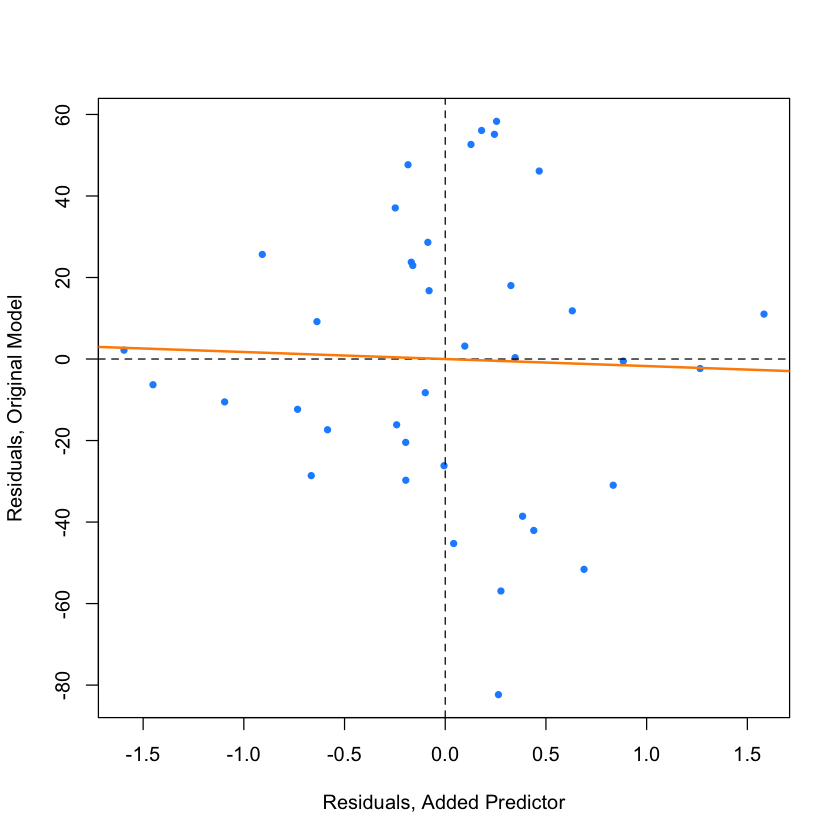

In [29]:
plot(resid(hip_model_small) ~ resid(ht_shoes_model_small), 
     col = "dodgerblue", pch = 20,
     xlab = "Residuals, Added Predictor", 
     ylab = "Residuals, Original Model")
abline(h = 0, lty = 2)
abline(v = 0, lty = 2)
abline(lm(resid(hip_model_small) ~ resid(ht_shoes_model_small)),
       col = "darkorange", lwd = 2)

The **variable added plot** shows almost no linear relationship. This indicates that adding HtShoes to the model would not improve the model. However it will increase the variation of the estimates and make the model much harder to interpret.

When we see a strong linear relationship in such a model,a large partial correlation coefficient, it is recommended to add the additional predictor to the model for further improvement.

This trade-off is mostly true in general. As a model gets more predictors, errors will get smaller and its prediction will be better, but it will be harder to interpret. This is why, if we are interested in explaining the relationship between the predictors and the response, we often want a model that fits well, but with a small number of predictors with little correlation.

Refernces: https://book.stat420.org/collinearity.html